# 머신러닝
- 데이터 : 학생 성적에 관한 소규모 데이터
- 시각화 포함 탐색적 자료분석 시행
- 결측치 식별, 예측하는 두가지 방법을 쓰고, 이를 선택한 이유 설명
- 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용, 이를 선택한 이유 설명
- 데이터 분할 방법을 2가지 쓰고, 적절한 데이터 분할을 적용, 이를 선택한 이유 설명
- svm, xgboost, ramdonforest 3개의 알고리즘 공통점을 쓰고 학생성적 예측 분석에 적합한 알고리즘인지 설명
- 세가지 모델 모두 모델링해보고 가장 적합한 알고리즘을 선택, 선택한 이유와 모델의 한계점, 보완 가능한 부분을 설명, 현업에서 주의할 점 기술

In [36]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data/ADP_book_ver01-main/data/student_data.csv")

#df.info()

df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,yes,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9
391,MS,M,no,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16
392,MS,M,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8
393,MS,M,no,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12


<BarContainer object of 19 artists>

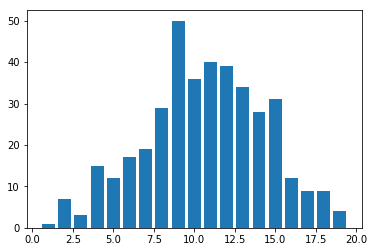

In [23]:
import matplotlib.pyplot as plt

# df['grade'].value_counts().index

plt.bar(df['grade'].value_counts().index, df['grade'].value_counts().values)

In [61]:
# 샤피로 윌크(shapiro-wilk) 정규성 검정
# 귀무가설 : 데이터가 정규분포를 따른다. 대립가설 : 정규분포를 따르지 않는다.
# p-value가 0.05보다 작으면 귀무가설 기각 => 정규분포를 따르지 않는다.

import scipy.stats as stats
# stats.shapiro(df["grade"])

print(type(stats.shapiro(df["grade"])))

result = stats.shapiro(df["grade"])

# dir(result)
#help(result)

print(result)


<class 'tuple'>
(0.9871256351470947, 0.0014306077500805259)


In [58]:
df[df.isna().any(axis=1)]

# help(df.isna)

from sklearn.impute import KNNImputer

KNN_data = df.drop(columns=['school', 'sex', 'paid', 'activities'])

KNN_data.info()

imputer = KNNImputer()
df_filled = imputer.fit_transform(KNN_data)
df_filled = pd.DataFrame(df_filled, columns=KNN_data.columns)
df[KNN_data.columns] = df_filled

df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   famrel    395 non-null    float64
 1   freetime  395 non-null    float64
 2   goout     395 non-null    float64
 3   Dalc      395 non-null    float64
 4   Walc      395 non-null    float64
 5   health    395 non-null    float64
 6   absences  395 non-null    float64
 7   grade     395 non-null    float64
 8   G1        395 non-null    float64
 9   G2        395 non-null    float64
dtypes: float64(10)
memory usage: 31.0 KB


school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

In [70]:
df.info()

df = pd.get_dummies(data = df, drop_first = True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   famrel          395 non-null    float64
 1   freetime        395 non-null    float64
 2   goout           395 non-null    float64
 3   Dalc            395 non-null    float64
 4   Walc            395 non-null    float64
 5   health          395 non-null    float64
 6   absences        395 non-null    float64
 7   grade           395 non-null    float64
 8   G1              395 non-null    float64
 9   G2              395 non-null    float64
 10  school_GP       395 non-null    uint8  
 11  school_MS       395 non-null    uint8  
 12  sex_F           395 non-null    uint8  
 13  sex_M           395 non-null    uint8  
 14  paid_no         395 non-null    uint8  
 15  paid_yes        395 non-null    uint8  
 16  activities_no   395 non-null    uint8  
 17  activities_yes  395 non-null    uin

In [81]:
from sklearn.model_selection import train_test_split

# 목획탐전분/변축생평적

# grade 컬럼을 없애는데, axis는 해당 컬럼을 없앤다는 의미
x = df.drop('grade', axis=1)
y = df['grade']

print(df.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(395, 18)
(276, 17)
(119, 17)
(276,)
(119,)
